# Data Exploration in Python
### Your name:

#### Now that you have some basic understanding of how to code in Python, we will now make use of a powerful package in Python called "pandas" to assist us in working with data!

### **THE TASK**

####  You're a new analyst for Bluebikes and the city wants to know how Bluebikes are being used to **ultimately ensure that there are enough bikes and docks available... whenever and wherever riders need them.**

#### Your boss provides a cleaner version of November 2025 ride data for you to analyze. Please find the data dictionary below.

### **DATA DICTIONARY**

#### The dataset contains information about all completed Bluebike rides that started/ended in November 2025 within Boston, Cambridge, Somerville, and Brookline municipalities. There are 11 columns, representing variables with the following details: 

`ride_id`: unique ID for each row of this dataset, representing a unique ride 

`rideable_type`: type of bike rode (classic_bike, electric_bike)

`start/end_station_name`: name of start/end station  

`start/end_municipality`: name of start/end municipality of bike station (Boston, Cambridge, Somerville, Brookline)

`member_casual`: type of rider (member, casual)

`start/end_tot_docks`: total number of docks at the start/end bike station

`start/end_dt`: date-time variable describing the start/end date and time of ride

**Original data source(s)**: 
  November 2025 ride data: https://bluebikes.com/system-data > https://s3.amazonaws.com/hubway-data/202511-bluebikes-tripdata.csv.zip
  Updated November 2025 station data: https://bluebikes.com/system-data >     https://assets.ctfassets.net/p6ae3zqfb1e3/5YxN7XJodVcCCYXl2mKdbc/5e0cc33e96dcbcb4524fbd6f679f1c66/-External-_11.17.25_Bluebikes_Station_List.csv

As always, we start by loading in libraries that we plan to use in our coding session.

In [93]:
## Import helpful libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting

Now, let's load in our data into the data frame. Both of our datasets are comma-separated (i.e. .csv files). Thanks to pandas, this is pretty easy! 

In [94]:
data = pd.read_csv("/Users/yungexiao/Desktop/Python Workshop 2026/btc_pic_workshop_2026/data/202511-ride-data-day1.csv").iloc[:, 1:] # load in our dataset as a data frame object, drop first column (auto-id column) 

# pd.read_excel is also commonly used when your dataset of interest is and .xlsx file


Now let's get to know our data. 
* Quick look at the first couple of observations. 
* Summary of columns 
* Some important things we might want to know are how many rows and columns (i.e. observations and variables) it contains, and more importantly, what they represent. Remember that this dataset is at the ride-level. 

In [95]:
# quick first look 

data.info() # great general information -- note what you learn
data.head() # what does this line do? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322998 entries, 0 to 322997
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ride_id             322998 non-null  object
 1   rideable_type       322998 non-null  object
 2   member_casual       322998 non-null  object
 3   start_station_name  322998 non-null  object
 4   end_station_name    322998 non-null  object
 5   start_municipality  322998 non-null  object
 6   end_municipality    322998 non-null  object
 7   start_tot_docks     322998 non-null  int64 
 8   end_tot_docks       322998 non-null  int64 
 9   start_dt            322998 non-null  object
 10  end_dt              322998 non-null  object
dtypes: int64(2), object(9)
memory usage: 27.1+ MB


,ride_id,rideable_type,member_casual,start_station_name,end_station_name,start_municipality,end_municipality,start_tot_docks,end_tot_docks,start_dt,end_dt
0,6D044C1BEC74632F,classic_bike,member,Massachusetts Ave at Boylston St.,Mass Ave T Stop,Boston,Boston,24,16,2025-11-01 00:00:01.822,2025-11-01 00:27:01.671
1,D577667C39F4AC97,electric_bike,member,Central Sq Post Office / Cambridge City Hall a...,Tremont St at W. Dedham St,Cambridge,Boston,17,15,2025-11-01 00:00:13.446,2025-11-01 00:13:39.43
2,3003D4EFBA42976B,classic_bike,member,Cross St at Hanover St,Lewis Wharf at Atlantic Ave,Boston,Boston,19,31,2025-11-01 00:00:44.502,2025-11-01 00:04:37.18
3,0494595E612E9BB6,classic_bike,casual,Main St at Austin St,Main St at Baldwin St,Boston,Boston,11,19,2025-11-01 00:00:46.747,2025-11-01 00:06:03.348
4,11E425700011F4EA,electric_bike,casual,Commonwealth Ave at Agganis Way,Egleston Square - Atherton St at Washington St,Boston,Boston,15,15,2025-11-01 00:01:17.031,2025-11-01 00:44:42.124


In [96]:
# Can also do: 
n_rows, n_cols = data.shape # store named variables for number of rows/columns -- can be useful for future reference (e.g. in a print statement, in a loop)
cols = data.columns.tolist() # store list of column names

print(f"Rows: {n_rows}, Columns: {n_cols}") # refer to stored objects
print("Column names:", cols)

Rows: 322998, Columns: 11
Column names: ['ride_id', 'rideable_type', 'member_casual', 'start_station_name', 'end_station_name', 'start_municipality', 'end_municipality', 'start_tot_docks', 'end_tot_docks', 'start_dt', 'end_dt']


In [97]:
# bonus: confirm that the number of rides corresponds to the number of unique ride_id

data['ride_id'].is_unique # helpful function that should be "True" "if there are only unique values of ride_id 

True

What if I wanted to know how many unique bluebike stations are in our dataset? 

This task highlights the importance of context, i.e. knowing how a ride is defined; a "ride" is defined by when and where a biker starts and stops their ride, so we need to consider both the start AND stop stations in our calculation.  

In [98]:
# number of unique bluebike stations in our dataset
n_stations = pd.concat([
    data.start_station_name,
    data.end_station_name
]).nunique() # the concatenate function (concat) allows us to "paste" vectors together into a single vector

print(f"There are {n_stations} unique stations in our dataset.")

There are 478 unique stations in our dataset.


Great! Hopefully we have a better idea of what we are working with now. Notice that we have some variables related to date and time that will be a lot easier to work with as datetime variable types. Let's practice converting variable types! 

In [104]:
# convert existing character date-time variable to date-time format, and create meaningful date-time variables
data['start_dt'] = (
    pd.to_datetime(data['start_dt'], format='ISO8601')
    .dt.tz_localize('UTC')
    .dt.tz_convert('America/New_York')
)

data['end_dt'] = (
    pd.to_datetime(data['end_dt'], format='ISO8601')
    .dt.tz_localize('UTC')
    .dt.tz_convert('America/New_York')
)

Nice! You'll see this is helpful because we can now create our first new variable that describes the ride duration. We can do this for minutes AND seconds. 

In [105]:
data = data.assign(
    ride_dur=data['end_dt'] - data['start_dt'],
    ride_dur_sec=lambda d: d['ride_dur'].dt.total_seconds(),
    ride_dur_min=lambda d: d['ride_dur_sec'].div(60).round(2) # can divide and round in one statement -- cool! 
) # assign function creates new columns and returns a new data frame (in this case, we modify our old data frame )

We might also want some additional date and time variables so that we can look at bike utilization patterns at different levels, i.e. hour, day, day of week (DOW)

In [106]:
data = data.assign(
    start_date=data['start_dt'].dt.normalize(), # normalize sets the time component to midnight, so the date is the only thing changing
    end_date=data['end_dt'].dt.normalize(),
    start_day=data['start_dt'].dt.day,
    end_day=data['end_dt'].dt.day,
    start_hour=data['start_dt'].dt.hour,
    end_hour=data['end_dt'].dt.hour,
    start_dow=data['start_dt'].dt.day_name(),
    end_dow=data['end_dt'].dt.day_name()
)

data[['ride_dur_sec','ride_dur_min','start_date', 'start_hour', 'start_dow']].head() # sanity check to see things make sense -- OK! 


,ride_dur_sec,ride_dur_min,start_date,start_hour,start_dow
0,1619.849,27.00,2025-10-31 00:00:00-04:00,20,Friday
1,805.984,13.43,2025-10-31 00:00:00-04:00,20,Friday
2,232.678,3.88,2025-10-31 00:00:00-04:00,20,Friday
3,316.601,5.28,2025-10-31 00:00:00-04:00,20,Friday
4,2605.093,43.42,2025-10-31 00:00:00-04:00,20,Friday


Cool -- now we know how long each ride was, and extracted helpful elements like the date and hour of the day and DOW in which the ride started and ended. Let's take a quick look at our current dataset!

In [107]:
data.head() # first 5 observations

,ride_id,rideable_type,member_casual,start_station_name,end_station_name,start_municipality,end_municipality,start_tot_docks,end_tot_docks,start_dt,...,ride_dur_sec,ride_dur_min,start_date,end_date,start_day,end_day,start_hour,end_hour,start_dow,end_dow
0,6D044C1BEC74632F,classic_bike,member,Massachusetts Ave at Boylston St.,Mass Ave T Stop,Boston,Boston,24,16,2025-10-31 20:00:01.822000-04:00,...,1619.849,27.00,2025-10-31 00:00:00-04:00,2025-10-31 00:00:00-04:00,31,31,20,20,Friday,Friday
1,D577667C39F4AC97,electric_bike,member,Central Sq Post Office / Cambridge City Hall a...,Tremont St at W. Dedham St,Cambridge,Boston,17,15,2025-10-31 20:00:13.446000-04:00,...,805.984,13.43,2025-10-31 00:00:00-04:00,2025-10-31 00:00:00-04:00,31,31,20,20,Friday,Friday
2,3003D4EFBA42976B,classic_bike,member,Cross St at Hanover St,Lewis Wharf at Atlantic Ave,Boston,Boston,19,31,2025-10-31 20:00:44.502000-04:00,...,232.678,3.88,2025-10-31 00:00:00-04:00,2025-10-31 00:00:00-04:00,31,31,20,20,Friday,Friday
3,0494595E612E9BB6,classic_bike,casual,Main St at Austin St,Main St at Baldwin St,Boston,Boston,11,19,2025-10-31 20:00:46.747000-04:00,...,316.601,5.28,2025-10-31 00:00:00-04:00,2025-10-31 00:00:00-04:00,31,31,20,20,Friday,Friday
4,11E425700011F4EA,electric_bike,casual,Commonwealth Ave at Agganis Way,Egleston Square - Atherton St at Washington St,Boston,Boston,15,15,2025-10-31 20:01:17.031000-04:00,...,2605.093,43.42,2025-10-31 00:00:00-04:00,2025-10-31 00:00:00-04:00,31,31,20,20,Friday,Friday


Woah, glad we checked -- notice how the some rides start/end in October? We are only interested in November for our analysis, so lets practice cleaning data by removing these observations.

In [108]:
# define start and end points of interest 
data = data.loc[
    data['start_date'].between('2025-11-01', '2025-11-30')
]

Okay great! I think it's time to get into drawing insights from the data. This next section is dedicated to describing our data (i.e. descriptive statistics). 

Let's recall the purpose of our data exploration by bringing back the guiding questions from earlier!

* How many bikes being used -- time-wise? date-wise? First create the grouped datasets. Then create some visualizations. 

In [109]:
# Time-wise: Hour of the day 
hourly_counts = (
    data
    .groupby('start_hour')
    .size()
)

# Date-wise 1: By date (day-granularity)
daily_counts = (
    data
    .groupby('start_date')
    .size()
)

# Date-wise 2: By DOW (Mon-Sun)
dow_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
] # define order for easier viewing

dow_counts = data['start_dow'].value_counts().reindex(dow_order)

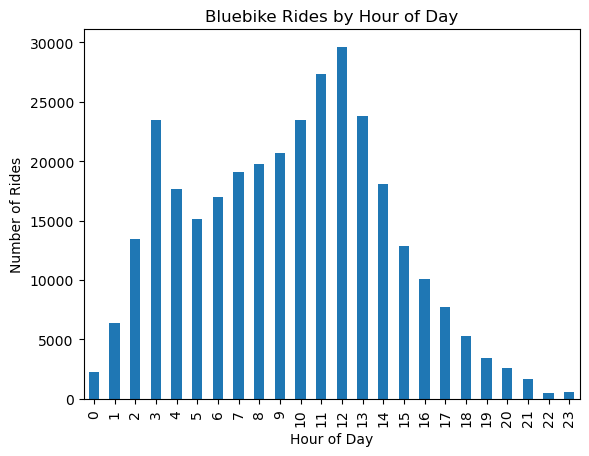

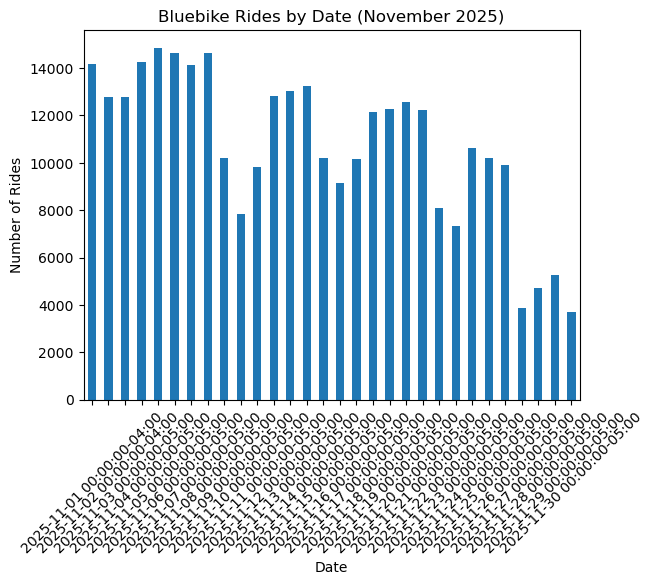

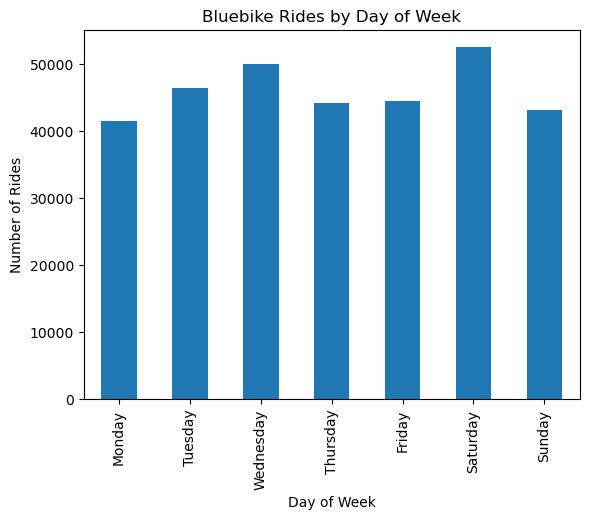

In [110]:
# use matlab package to plot
plt.figure()
hourly_counts.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Bluebike Rides by Hour of Day')
plt.show()

plt.figure()
daily_counts.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Bluebike Rides by Date (November 2025)')
plt.xticks(rotation=45)
plt.show()

plt.figure()
dow_counts.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.title('Bluebike Rides by Day of Week')
plt.show()

* Where are they being used -- which stations are being docked at, from which stations are bikes being taken from? How frequently? 

In [112]:
# BY STATION SUMMARY
start_station_counts = (
    data['start_station_name']
    .value_counts()
)

end_station_counts = (
    data['end_station_name']
    .value_counts()
)

station_summary = (
    pd.DataFrame({
        'starts': start_station_counts,
        'ends': end_station_counts
    })
    .fillna(0)
    .assign(net=lambda d: d['starts'] - d['ends']) # create new variable that calculates total net start-end rides
    .sort_values('net', ascending=False) 
)

station_summary

# Think about what the net value tells us... 
## top "exporters" (more rides start here than end here) -- DRAIN
## top "importers" (more rides end here than start here) -- ACCUMULATION

,starts,ends,net
Government Center - Cambridge St at Court St,1564,1276,288
St. Alphonsus St at Tremont St,1318,1081,237
MIT Vassar St,4696,4460,236
MIT Pacific St at Purrington St,3693,3510,183
Sennott Park Broadway at Norfolk Street,1624,1447,177
...,...,...,...
Boylston St at Arlington St,1276,1455,-179
Nashua Street at Red Auerbach Way,1072,1260,-188
Longwood Ave at Binney St,1643,1842,-199
Copley Square - Dartmouth St at Boylston St,1347,1550,-203


In [113]:
# BY MUNICIPALITY SUMMARY
start_muni_counts = (
    data['start_municipality']
    .value_counts()
)

end_muni_counts = (
    data['end_municipality']
    .value_counts()
)

municipality_summary = (
    pd.DataFrame({
        'starts': start_muni_counts,
        'ends': end_muni_counts
    })
    .assign(net=lambda d: d['starts'] - d['ends']) 
)

municipality_summary

,starts,ends,net
Boston,185931,187439,-1508
Cambridge,108451,107947,504
Somerville,19540,18679,861
Brookline,7776,7633,143


* How long is a typical bike ride? Is the duration highly variable (i.e. wide range of times)? 

In [114]:
# Solid summary for ride durations (in minutes) 
data['ride_dur_min'].describe()

count    321698.000000
mean         13.123740
std          27.064823
min           0.990000
25%           5.720000
50%           9.310000
75%          15.220000
max        1475.620000
Name: ride_dur_min, dtype: float64

In [115]:
# Average ride duration, across... 

## Date
avg_duration_by_date = (
    data
    .groupby('start_date')['ride_dur_min']
    .mean()
    )   

## Hour of the day 
avg_duration_by_hour = (
    data
    .groupby('start_hour')['ride_dur_min']
    .mean()
    )
 
## DOW 
avg_duration_by_dow = (
    data
    .groupby('start_dow')['ride_dur_min']
    .mean()
    .reindex(dow_order)
    )

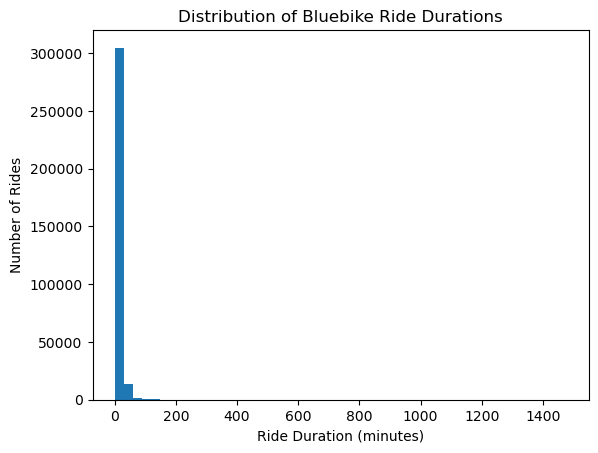

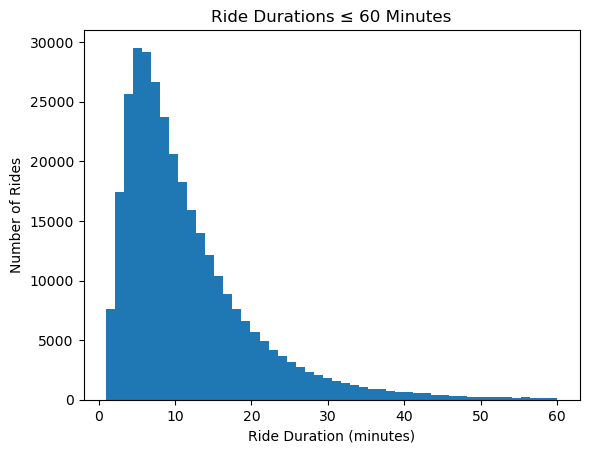

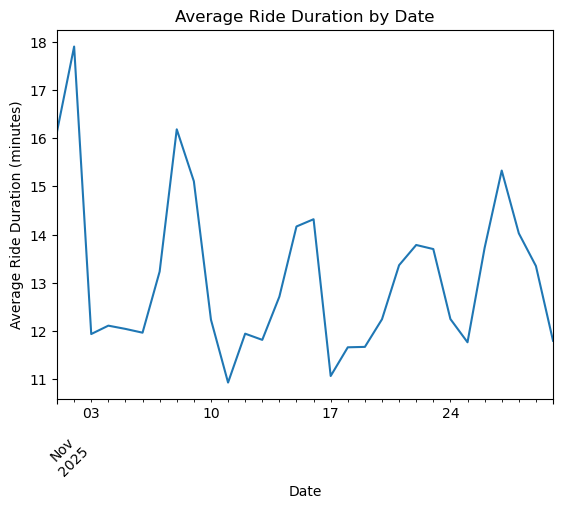

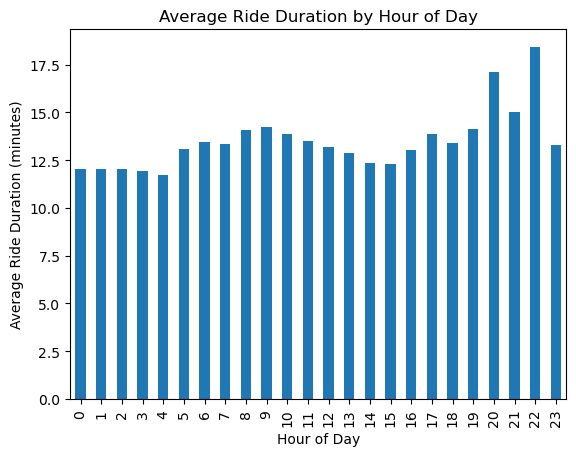

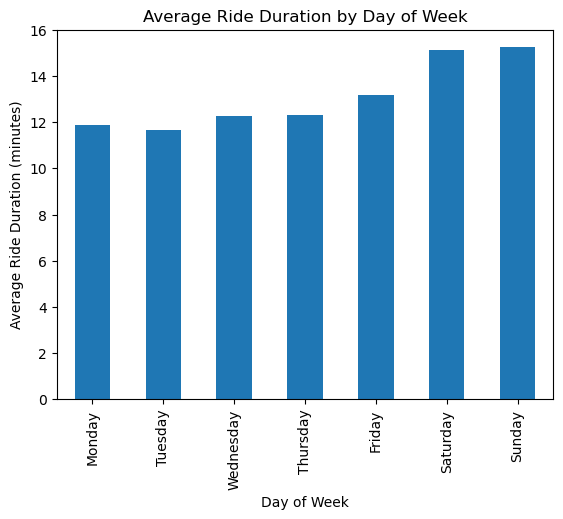

In [117]:
# Histogram of ride durations 
plt.figure()
data['ride_dur_min'].plot(kind='hist', bins=50)
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Number of Rides')
plt.title('Distribution of Bluebike Ride Durations')
plt.show()

# zoom in for rides under an hour
plt.figure()
data.loc[data['ride_dur_min'] <= 60, 'ride_dur_min'].plot(kind='hist', bins=50)
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Number of Rides')
plt.title('Ride Durations ≤ 60 Minutes')
plt.show()

# avg duration by date
plt.figure()
avg_duration_by_date.plot()
plt.xlabel('Date')
plt.ylabel('Average Ride Duration (minutes)')
plt.title('Average Ride Duration by Date')
plt.xticks(rotation=45)
plt.show()

# avg duration by hour
plt.figure()
avg_duration_by_hour.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Average Ride Duration (minutes)')
plt.title('Average Ride Duration by Hour of Day')
plt.show()

# avg duration by DOW
plt.figure()
avg_duration_by_dow.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Average Ride Duration (minutes)')
plt.title('Average Ride Duration by Day of Week')
plt.show()

#### Getting the hang of it? Let's show off some powerful things that Python and pandas can let us do to help the city with its primary goal: enough bikes and docks at the right time and place. 

Consider these as fun bonus challenges/extensions. Please note that these involve more advanced coding, and are beyond the scope of this class. 

**Focus on why we might do such analyses of the data, and what insights we can extract from them!** 

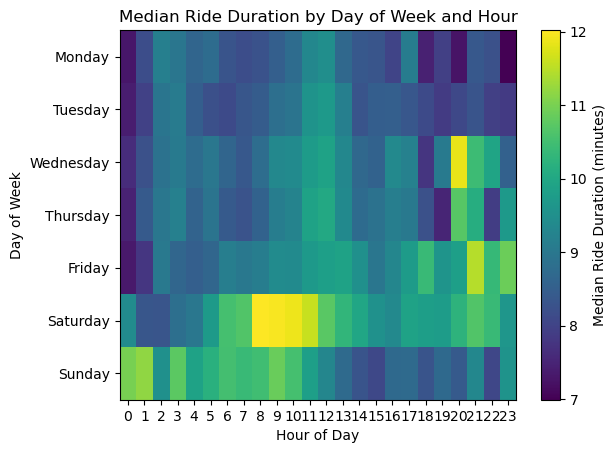

In [118]:
# Cool bonus heatmap to see two time variables at once 

median_hour_dow = (
    data
    .groupby(['start_dow', 'start_hour'])['ride_dur_min']
    .median()
    .unstack()
    .reindex(dow_order)
)

plt.figure()
plt.imshow(median_hour_dow, aspect='auto')
plt.colorbar(label='Median Ride Duration (minutes)')

plt.xticks(
    ticks=range(len(median_hour_dow.columns)),
    labels=median_hour_dow.columns
)
plt.yticks(
    ticks=range(len(median_hour_dow.index)),
    labels=median_hour_dow.index
)

plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Median Ride Duration by Day of Week and Hour')
plt.show()

In [119]:
# Station imbalance

station_flows = (
    data
    .groupby('start_station_name')
    .size()
    .to_frame('starts')
    .join(
        data.groupby('end_station_name').size().to_frame('ends'),
        how='outer'
    )
    .fillna(0)
)

station_flows = station_flows.assign(
    net_flow=station_flows['starts'] - station_flows['ends']
)

In [120]:
# Normalize by dock capacity (THINK: why do we want to do this?)

dock_capacity = (
    data
    .groupby('start_station_name')['start_tot_docks']
    .first()
)

station_flows = station_flows.join(dock_capacity)

station_flows = station_flows.assign(
    net_flow_per_dock=station_flows['net_flow'] /
                      station_flows['start_tot_docks']
)


In [ ]:
# Hourly imbalances

hourly_station_flow = (
    data
    .groupby(['start_station_name', 'start_hour'])
    .agg(
        starts=('ride_id', 'size'),
        ends=('end_station_name', 'count')
    )
    .assign(
        net_flow=lambda x: x['starts'] - x['ends']
    )
)

In [121]:
# Defining a high-risk station (low number of docks and heavily imbalanced)

high_risk_stations = (
    station_flows
    .assign(
        abs_stress=lambda x: x['net_flow_per_dock'].abs()
    )
    .sort_values('abs_stress', ascending=False)
    .head(15)
)

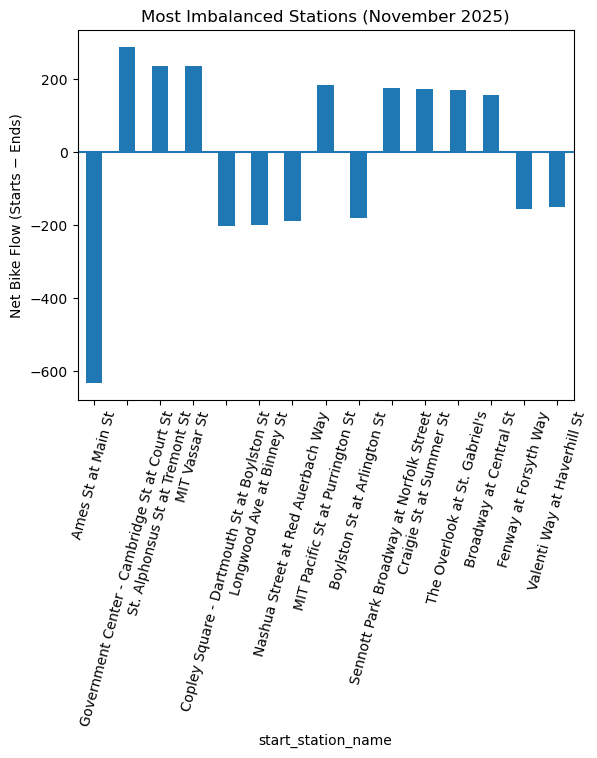

In [122]:
# VISUALIZE: net flow per station (Which stations lose or gain bikes overall)

station_flows = (
    data
    .groupby('start_station_name')
    .size()
    .to_frame('starts')
    .join(
        data.groupby('end_station_name').size().to_frame('ends'),
        how='outer'
    )
    .fillna(0)
    .assign(net_flow=lambda x: x['starts'] - x['ends'])
)

top_imbalance = (
    station_flows
    .assign(abs_flow=lambda x: x['net_flow'].abs())
    .sort_values('abs_flow', ascending=False)
    .head(15)
)

import matplotlib.pyplot as plt

plt.figure()
top_imbalance['net_flow'].plot(kind='bar')
plt.axhline(0)
plt.ylabel('Net Bike Flow (Starts − Ends)')
plt.title('Most Imbalanced Stations (November 2025)')
plt.xticks(rotation=75)
plt.show()

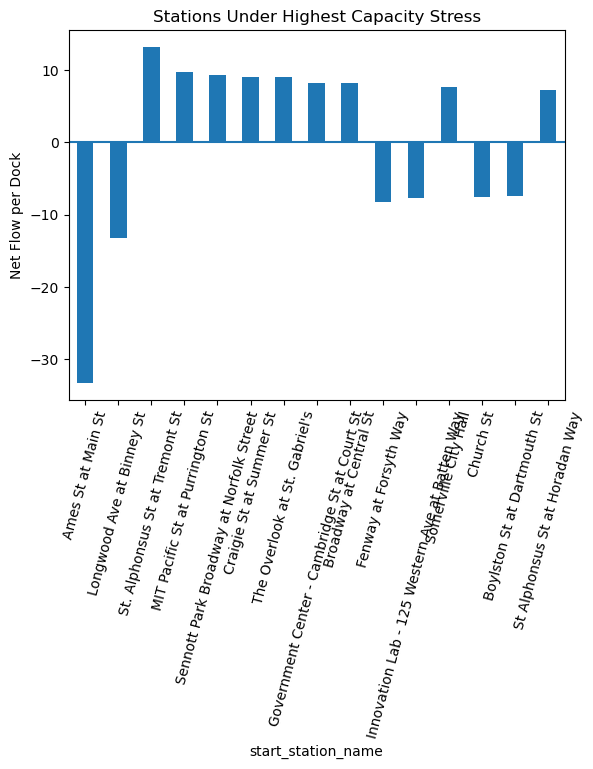

In [123]:
# Visualize: net flow per dock (which stations are stressed relative to their size)

dock_capacity = (
    data
    .groupby('start_station_name')['start_tot_docks']
    .first()
)

station_flows = station_flows.join(dock_capacity)

station_flows['net_flow_per_dock'] = (
    station_flows['net_flow'] / station_flows['start_tot_docks']
)

top_stress = (
    station_flows
    .assign(abs_stress=lambda x: x['net_flow_per_dock'].abs())
    .sort_values('abs_stress', ascending=False)
    .head(15)
)

plt.figure()
top_stress['net_flow_per_dock'].plot(kind='bar')
plt.axhline(0)
plt.ylabel('Net Flow per Dock')
plt.title('Stations Under Highest Capacity Stress')
plt.xticks(rotation=75)
plt.show()